<a href="https://colab.research.google.com/github/w2k31984/Challenge1_Alura_Store_DS/blob/master/Challenge_Alura_Store_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge Alura Store Data Science.
Descripcion del desafio: <br>
Me han contratado para realizar este análisis. Nuestro jefe nos ha pedido que hagas la evaluación basándose en estos cinco aspectos:


1. Facturación total de cada tienda, es decir, cuál tienda vende más.
2. Cuál es son las categorías más populares de cada tienda.
3. Cuál es productos se venden más en cada tienda.
4. Cuál es el promedio de evaluación de cada uno de los clientes.
5. Cuál es son los productos más y menos vendidos en cada tienda.
6. cuál es el costo promedio del envío desde la tienda hasta el lugar de
  cada uno de los clientes.
7. Analisis de los resultados.


In [ ]:
# Importando la librería de pandas y los datos desde el repositorio de GitHub
import pandas as pd

import matplotlib.pyplot as plt # Para crear graficas sencillas.


# URLs raw de los archivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargando los datos desde las URLs raw
tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

print("Informacion cargada con exito!")


Informacion cargada con exito!


In [ ]:
# Mostrar las primeras filas del DataFrame
print(tienda_1.head())

print("----------------------------------------------------------------------------------")

# Mostrar los nombres de las columnas
print(tienda_1.columns)

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito   

#1. Analisis de facturación.
Facturación total de cada tienda, es decir, cuál tienda vende más.


In [ ]:
#1 Calcular el total de facturación para cada tienda
total_facturacion_tienda_1 = tienda_1["Precio"].sum()
total_facturacion_tienda_2 = tienda_2["Precio"].sum()
total_facturacion_tienda_3 = tienda_3["Precio"].sum()
total_facturacion_tienda_4 = tienda_4["Precio"].sum()

# Mostrar los resultados
print(f"Total de facturación de Tienda 1: {round(total_facturacion_tienda_1,2)} pesos")
print(f"Total de facturación de Tienda 2: {round(total_facturacion_tienda_2,2)} pesos")
print(f"Total de facturación de Tienda 3: {round(total_facturacion_tienda_3,2)} pesos")
print(f"Total de facturación de Tienda 4: {round(total_facturacion_tienda_4,2)} pesos")

Total de facturación de Tienda 1: 1150880400.0 pesos
Total de facturación de Tienda 2: 1116343500.0 pesos
Total de facturación de Tienda 3: 1098019600.0 pesos
Total de facturación de Tienda 4: 1038375700.0 pesos


In [ ]:
# Creando un DataFrame con los totales de facturación
totales_facturacion = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Total Facturación": [
        total_facturacion_tienda_1,
        total_facturacion_tienda_2,
        total_facturacion_tienda_3,
        total_facturacion_tienda_4
    ]
})

# Mostrar el DataFrame
print(totales_facturacion)

     Tienda  Total Facturación
0  Tienda 1       1.150880e+09
1  Tienda 2       1.116344e+09
2  Tienda 3       1.098020e+09
3  Tienda 4       1.038376e+09


In [ ]:
# Desactivar la notación científica en pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Ordenar las categorías por cantidad vendida (de mayor a menor)
totales_facturacion = totales_facturacion.sort_values(by="Tienda", ascending=False)

# Mostrar el DataFrame con los totales de facturación
print(totales_facturacion)

     Tienda  Total Facturación
3  Tienda 4      1038375700.00
2  Tienda 3      1098019600.00
1  Tienda 2      1116343500.00
0  Tienda 1      1150880400.00


#2. Analisis de Categorias.
Las categorías más populares de cada tienda.

In [ ]:
# Combinar todos los datos en un solo DataFrame
datos_combinados = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)
print("Informacion cargada con exito!")

Informacion cargada con exito!


In [ ]:
# Agrupar por categoría y sumar la cantidad vendida
categorias_mas_vendidas = datos_combinados.groupby("Categoría del Producto")["Precio"].sum().reset_index()

# Renombrar la columna 'Precio' por 'cantidad'
categorias_mas_vendidas = categorias_mas_vendidas.rename(columns={"Precio": "Cantidad"})

# Ordenar las categorías por cantidad vendida (de mayor a menor)
categorias_mas_vendidas = categorias_mas_vendidas.sort_values(by="Cantidad", ascending=False)

# Mostrar las categorías más vendidas
print(categorias_mas_vendidas)

    Categoría del Producto      Cantidad
3             Electrónicos 1660576500.00
2        Electrodomésticos 1324751100.00
7                  Muebles  757661000.00
4   Instrumentos musicales  348772600.00
1     Deportes y diversión  142977700.00
5                 Juguetes   73604400.00
0  Artículos para el hogar   57579800.00
6                   Libros   37696100.00


#3. Cuál es productos se venden más en tiendas.

In [ ]:
# Agrupar por productos y sumar la cantidad vendida
productos_mas_vendidos = datos_combinados.groupby("Producto")["Precio"].sum().reset_index()

# Renombrando el campo 'Precio' a 'Cantidad'
productos_mas_vendidos = productos_mas_vendidos.rename(columns={"Precio": "Cantidad"})

# Ordenar las categorías por cantidad vendida (de mayor a menor)
productos_mas_vendidos = productos_mas_vendidos.sort_values(by="Producto", ascending=False)

# Mostrar las categorías más vendidas
print(productos_mas_vendidos)

                       Producto     Cantidad
50                 Vaso térmico   8497400.00
49                  Tablet ABXY 219012800.00
48                TV LED UHD 4K 432489600.00
47              Sofá reclinable 123279100.00
46                   Smartwatch  29929800.00
45                     Smart TV 290221800.00
44                       Sillón  40796800.00
43             Silla de oficina  69099000.00
42                 Set de vasos   5584200.00
41                 Set de ollas  30506400.00
40             Secadora de ropa 210238000.00
39                 Refrigerador 384937400.00
38                    Pandereta  12663400.00
37              Olla de presión  12928800.00
36                  Muñeca bebé   8591500.00
35          Modelado predictivo  12616100.00
34                      Mochila  16065700.00
33                   Microondas 115699500.00
32                Mesa de noche  58419500.00
31              Mesa de comedor  46815700.00
30               Mesa de centro  29842000.00
29        

In [ ]:
# Mostrar las 10 primeras categorías más vendidas
top_10_productos = productos_mas_vendidos.head(10)
print(top_10_productos)

            Producto     Cantidad
48     TV LED UHD 4K 432489600.00
25         Iphone 15 401051200.00
39      Refrigerador 384937400.00
45          Smart TV 290221800.00
28  Lavadora de ropa 242468600.00
29      Lavavajillas 240536500.00
49       Tablet ABXY 219012800.00
40  Secadora de ropa 210238000.00
13      Celular ABXY 157911100.00
7            Batería 147806300.00


#4 .Cuál es el promedio de evaluación de cada uno de los clientes.

In [ ]:
# Eliminar valores nulos en la columna "evaluacion"
datos_combinados = datos_combinados.dropna(subset=["Calificación"])

# Calcular el promedio de evaluación
promedio_evaluacion = datos_combinados["Calificación"].mean()

# Mostrar el resultado
print(f"El promedio de Calificación de los clientes en escala de 1-5 es: {promedio_evaluacion:.2f} %")

El promedio de Calificación de los clientes en escala de 1-5 es: 4.01 %


#5. Productos menos vendidos en las tiendas.

In [ ]:
#Combinar todos los datos en un solo DataFrame
datos_combinados1 = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

# Agrupar por producto y sumar la cantidad vendida
productos_menos_vendidos = datos_combinados1.groupby("Producto")["Precio"].sum().reset_index()

# Ordenar los productos por cantidad vendida (de menor a mayor)
productos_menos_vendidos = productos_menos_vendidos.sort_values(by="Precio", ascending=True)

# Seleccionar el producto menos vendido
productos_menos_vendidos = productos_menos_vendidos.iloc[0]

# Mostrar el resultado
print(f"Producto menos vendido: {productos_menos_vendidos['Producto']}")

Producto menos vendido: Cubo mágico 8x8


#6. cuál es el costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes.

In [ ]:
# Eliminar valores nulos en la columna "costo_envio"
datos_combinados = datos_combinados.dropna(subset=["Costo de envío"])

# Calcular el promedio del costo de envío
promedio_costo_envio = datos_combinados["Costo de envío"].mean()

# Mostrar el resultado
print(f"El costo promedio del envío es: {promedio_costo_envio:.2f} pesos colombianos COP")

El costo promedio del envío es: 24875.15 pesos colombianos COP


#7. Conclusiones del Analisis
#**Título del Reporte : Análisis de situación de tiendas.**

## Introducción
Este análisis tiene como objetivo, plantear solución a algunas incognitas planteadas por el cliente sobre las diferentes tiendas que este posee y para evaluar en base a este y sus conclusiones la decisión de cerrar algunas de estas o dar continuidad con nuevas estrategias en base a los datos analizados y presentados.

## Análisis
A continuación, se presentan los resultados obtenidos segun las preguntas realizadas.



1. Facturación total de cada tienda, es decir, cuál tienda vende más. <br>
 **R/  -La tienda que más vende es: Tienda 1 con un total de 1150880400.0 <br>
      -La tienda que menos vende es: Tienda 4 con un total de 1038375700.0** <br>
      *Las cantidades son representadas en pesos colombianos COP*

In [ ]:
print(totales_facturacion)

     Tienda  Total Facturación
0  Tienda 1      1150880400.00
1  Tienda 2      1116343500.00
2  Tienda 3      1098019600.00
3  Tienda 4      1038375700.00


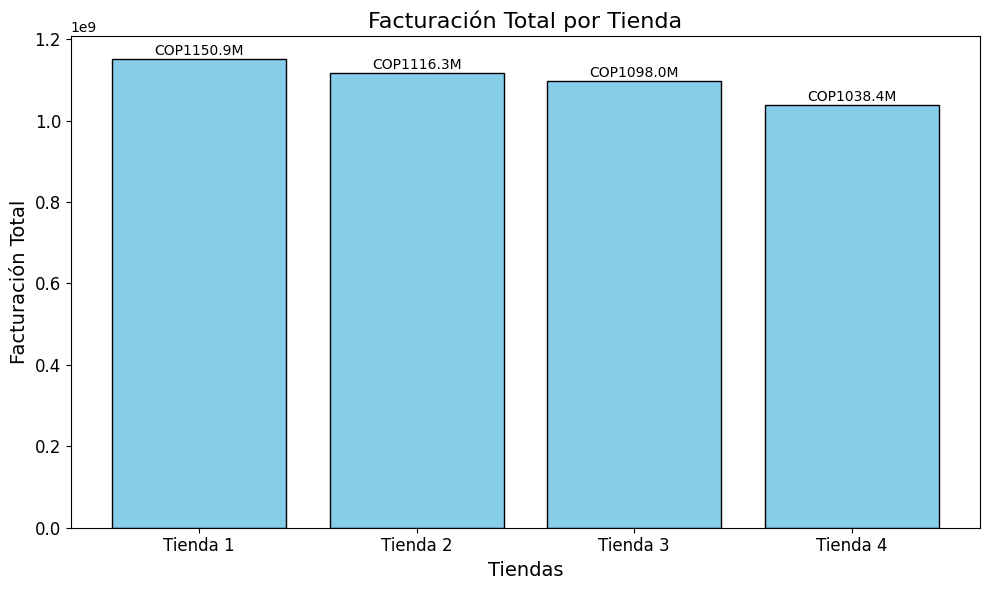

In [84]:
import matplotlib.pyplot as plt

# Datos proporcionados
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [1150880400.00, 1116343500.00, 1098019600.00, 1038375700.00]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(tiendas, facturacion, color='skyblue', edgecolor='black')

# Personalizar la gráfica
plt.title('Facturación Total por Tienda', fontsize=16)  # Título
plt.xlabel('Tiendas', fontsize=14)  # Etiqueta del eje X
plt.ylabel('Facturación Total', fontsize=14)  # Etiqueta del eje Y
plt.xticks(fontsize=12)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje Y

# Agregar los valores encima de las barras
for i, valor in enumerate(facturacion):
    plt.text(i, valor + 10000000, f'COP{valor / 1e6:.1f}M', ha='center', fontsize=10)

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

2. Cuál es son las categorías más populares de cada tienda.
**1            Electrónicos <br>
2        Electrodomésticos <br>
3                  Muebles <br>
4   Instrumentos musicales <br>
5     Deportes y diversión <br>
6                 Juguetes  
7  Artículos para el hogar   
8                   Libros**



#3. Cuál es productos se venden más en tiendas.
Para esta respuesta revisaremos el TOP 10 de los productos mas vendidos en tiendas.

In [ ]:
# Mostrar las 10 primeras categorías más vendidas
top_10_productos = productos_mas_vendidos.head(10)
print(top_10_productos)

            Producto     Cantidad
50      Vaso térmico   8497400.00
49       Tablet ABXY 219012800.00
48     TV LED UHD 4K 432489600.00
47   Sofá reclinable 123279100.00
46        Smartwatch  29929800.00
45          Smart TV 290221800.00
44            Sillón  40796800.00
43  Silla de oficina  69099000.00
42      Set de vasos   5584200.00
41      Set de ollas  30506400.00


#4 .Cuál es el promedio de evaluación de cada uno de los clientes.
**R/ -El promedio de Calificación de los clientes en escala de (1-5) es: 4.01 %**


#5.Productos menos vendidos en las tiendas.
**R/ Producto menos vendido en tiendas es: Cubo mágico 8x8**

#6. cuál es el costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes.
**R/El costo promedio del envío es: 24875.15 pesos colombianos COP**